In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [17]:
df = pd.read_csv('~/Desktop/cs209a-FinalProject/Harvard_G1/data/Merged_Fundamentals_and_Polls/Remastered_df_10pred.csv')

In [18]:
display(df.head())

,Unnamed: 0,popular_vote_percentage,NAP,payroll,stock,rdi,election,national_polls,gdp,state_election,Democrat_Republican
0,0,49.55,0.825641,0.234242,-9.718823,-1.423503,0.031317,1.083528,-0.089281,0.0,1
1,1,45.07,0.825641,0.234242,-9.718823,-1.423503,0.031317,0.377789,-0.089281,0.0,0
2,2,55.18,-0.310126,0.261147,-1.243207,9.327366,0.115117,-0.339976,0.243113,-1.0,0
3,3,44.33,-0.310126,0.261147,-1.243207,9.327366,0.115117,0.145107,0.243113,-1.0,1
4,4,57.37,0.277996,0.160302,-16.387651,6.012349,0.055845,0.396180,0.158822,1.0,0


In [21]:
X = df.drop(['Unnamed: 0', 'popular_vote_percentage'], axis=1)
Y = df['popular_vote_percentage']
X_train = X.drop([36,37]).values
y_train = Y.drop([36,37]).values
X_test = X.iloc[[36,37]].values
y_test = Y.iloc[[36,37]].values

In [23]:
X_1 = df.drop(['Unnamed: 0', 'popular_vote_percentage', 'Democrat_Republican', 'state_election'], axis=1)
scaler = StandardScaler()
scaler.fit(X_1)
x_2 = scaler.transform(X_1)
X_2 = pd.DataFrame(x_2, columns = ['NAP', 'payroll','stock','rdi','election','national_polls','gdp'])
X_2['Democrat_Republican'] = df['Democrat_Republican']
X_2['state_election'] = df['state_election']
X_train1 = X_2.drop([36,37]).values
X_test1 = X_2.iloc[[36,37]].values
display(X_2)

,NAP,payroll,stock,rdi,election,national_polls,gdp,Democrat_Republican,state_election
0,2.317666,0.694822,-0.191417,-0.443721,-0.043218,2.009872,-2.811254,1,0.0
1,2.317666,0.694822,-0.191417,-0.443721,-0.043218,0.271941,-2.811254,0,0.0
2,-1.618086,0.816498,0.393234,1.600343,1.549956,-1.495606,2.293957,0,-1.0
3,-1.618086,0.816498,0.393234,1.600343,1.549956,-0.301056,2.293957,1,-1.0
4,0.419923,0.360434,-0.651435,0.970059,0.423092,0.317229,0.999344,0,1.0
5,0.419923,0.360434,-0.651435,0.970059,0.423092,-0.326338,0.999344,1,1.0
6,0.011446,0.036944,-0.169566,0.769470,-1.287107,0.063623,0.379243,1,-1.0
7,0.011446,0.036944,-0.169566,0.769470,-1.287107,0.013565,0.379243,0,-1.0
8,-0.744231,0.323772,-0.014344,0.312956,0.338592,-0.900030,0.806024,1,1.0
9,-0.744231,0.323772,-0.014344,0.312956,0.338592,3.529049,0.806024,0,1.0


### LassoCV Model
##### Not Standardized Data

In [24]:
# List of hyper-parameter values 

alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100,1000]

# Create two lists for training and validation error

training_error, validation_error = [],[]

for i, alpha in enumerate(alphas):
    
    # For each i, fit a ridge regression on training set
    
    lasso = Lasso(fit_intercept=True, alpha=alpha)
    #lasso.fit(X_train,y_train)
    lasso_cv = cross_validate(lasso, X_train, y_train, cv = 5, scoring=('neg_mean_squared_error'))
    
    # Compute the training and validation errors got after cross validation
    mse_val = np.mean(np.abs(lasso_cv['test_score']))
        
    # Append the MSEs to their respective lists 
    validation_error.append(mse_val)

best_mse  = np.min(validation_error)
best_parameter = alphas[np.argmin(validation_error)]


/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.9960240740985, tolerance: 0.10804503428571427
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm 

In [25]:
print(f"MSE: {best_mse}, best alpha: {best_parameter}")

MSE: 37.20568370440923, best alpha: 10


In [26]:
lasso = Lasso(fit_intercept=True, alpha=10).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso R2: {r2_score(y_test, y_pred_lasso)}")
print(y_pred_lasso)
print(lasso.coef_)
print(lasso.intercept_)

Lasso MSE: 4.524136111111125
Lasso R2: -0.5654450211457194
[47.82166667 47.82166667]
[-0.  0. -0. -0. -0. -0.  0. -0. -0.]
47.82166666666666


### LassoCV Model
##### Standardized Data

In [27]:
# List of hyper-parameter values 

alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100,1000]

# Create two lists for training and validation error

validation_error1 = []

for i, alpha in enumerate(alphas):
    
    # For each i, fit a ridge regression on training set
    
    lasso = Lasso(fit_intercept=True, alpha=alpha)
    #lasso.fit(X_train,y_train)
    lasso_cv1 = cross_validate(lasso, X_train1, y_train, cv = 5, scoring=('neg_mean_squared_error'))
    
    # Compute the training and validation errors got after cross validation
    mse_val = np.mean(np.abs(lasso_cv1['test_score']))
        
    # Append the MSEs to their respective lists 
    validation_error1.append(mse_val)

best_mse1  = np.min(validation_error1)
best_parameter1 = alphas[np.argmin(validation_error1)]


/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.99602407409793, tolerance: 0.10804503428571427
  model = cd_fast.enet_coordinate_descent(
/Users/talelokvenec/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: UserWarning: With alpha=0, this algorithm

In [28]:
print(f"MSE: {best_mse1}, best alpha: {best_parameter1}")

MSE: 37.20568370440923, best alpha: 10


In [29]:
lasso1 = Lasso(fit_intercept=True, alpha=10).fit(X_train1, y_train)
y_pred_lasso1 = lasso1.predict(X_test1)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso1)}")
print(f"Lasso R2: {r2_score(y_test, y_pred_lasso1)}")
print(y_pred_lasso1)
print(lasso1.coef_)
print(lasso1.intercept_)

Lasso MSE: 4.524136111111125
Lasso R2: -0.5654450211457194
[47.82166667 47.82166667]
[-0.  0. -0. -0. -0. -0.  0. -0. -0.]
47.82166666666666


#### Tried once more using LassoCV model, in case I was doing something wrong above, still the same result.

In [30]:
lassoCV = LassoCV(fit_intercept = True, cv = 5).fit(X_train1, y_train)
y_pred_lassoCV = lassoCV.predict(X_test1)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lassoCV)}")
print(f"Lasso R2: {r2_score(y_test, y_pred_lassoCV)}")
print(y_pred_lassoCV)
print(lassoCV.coef_)
print(lassoCV.intercept_)

Lasso MSE: 4.524136111111125
Lasso R2: -0.5654450211457194
[47.82166667 47.82166667]
[-0.  0. -0. -0. -0. -0.  0. -0. -0.]
47.82166666666666


### PCA
#### Standardized Data

In [31]:
X_pca = X_2.values
pca = PCA().fit(X_pca)
X_2_PCA = pca.transform(X_pca)
print(pca.explained_variance_ratio_)
df_PCA = pd.DataFrame(X_2_PCA[:,0:6], columns = [['PCA1' , 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']])
display(df_PCA)
X_train_pca = df_PCA.drop([36,37]).values
X_test_pca = df_PCA.iloc[[36,37]].values

[0.31236123 0.2226887  0.13932112 0.11166227 0.08443899 0.0622966
 0.03024289 0.02505786 0.01193034]


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,2.316111,-2.372364,-2.244506,0.411688,-1.253257,0.479474
1,2.055887,-1.975623,-1.187277,-0.365806,-2.058805,0.337249
2,-3.810777,1.391599,0.691553,0.044185,-0.323877,0.427886
3,-3.633294,1.122014,-0.020166,0.563587,0.205593,0.517815
4,-0.696461,-0.112131,0.051944,1.287707,0.052392,-0.692427
5,-0.798868,0.048419,0.508995,0.934048,-0.352038,-0.779402
6,0.069391,1.226276,-0.301185,0.505179,-0.366204,1.177345
7,0.066180,1.228040,-0.317193,0.529383,-0.314186,1.197564
8,-1.095088,0.344331,0.854294,-0.190131,0.107043,-0.870348
9,-0.416260,-0.702062,-2.009782,1.961555,2.434797,-0.419048


### 1. Linear Regression
#### - Initial DataFrame

In [33]:
lreg = LinearRegression()
lreg.fit(X_train1, y_train)
y_test_pred_lreg = lreg.predict(X_test1)
print(f"MSE: {mean_squared_error(y_test, y_test_pred_lreg)}")
print(f"R2: {r2_score(y_test, y_test_pred_lreg)}")
print(y_test_pred_lreg)
lreg_initial_mse = mean_squared_error(y_test, y_test_pred_lreg)
lreg_initial_r2 = r2_score(y_test, y_test_pred_lreg)

MSE: 98.1840588708088
R2: -32.97372279266743
[40.64007287 38.5251679 ]


In [34]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_test_pred_lreg1 = lreg.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_test_pred_lreg1)}")
print(f"R2: {r2_score(y_test, y_test_pred_lreg1)}")
print(y_test_pred_lreg1)

MSE: 98.18405887080563
R2: -32.97372279266634
[40.64007287 38.5251679 ]


#### - PCA DataFrame

In [35]:
lreg_pca = LinearRegression()
lreg_pca.fit(X_train_pca, y_train)
y_test_pred_lreg_pca = lreg_pca.predict(X_test_pca)
print(f"MSE: {mean_squared_error(y_test, y_test_pred_lreg_pca)}")
print(f"R2: {r2_score(y_test, y_test_pred_lreg_pca)}")
print(y_test_pred_lreg_pca)
lreg_pca_mse = mean_squared_error(y_test, y_test_pred_lreg_pca)
lreg_pca_r2 = r2_score(y_test, y_test_pred_lreg_pca)

MSE: 4.88000641758609
R2: -0.6885835354969185
[47.53195257 47.67868596]


In [36]:
results_df = pd.DataFrame({'regressor':['Linear Regression Initial Data', 'Linear Regression PCA'],
                          'MSE':[lreg_initial_mse, lreg_pca_mse],
                          'R2':[lreg_initial_r2, lreg_pca_r2]})
display(results_df)

,regressor,MSE,R2
0,Linear Regression Initial Data,98.184059,-32.973723
1,Linear Regression PCA,4.880006,-0.688584


### 2. Lasso Regression
#### - Initial DataFrame

In [55]:
# Bootstrapping Lasso
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

In [63]:
X_2_y = X_2.copy()
X_2_y['popular_vote_percentage'] = df['popular_vote_percentage']
X_2_y = X_2_y.drop([36,37])

In [99]:
# HERE WE NEED TO ADD THE CODE TO APPEND THE INTERCEPTS AND COEFFICIENTS FROM THE BOOTSTRAPS AND MAKE A HISTOGRAM OF THOSE
n_bootstraps = 100
coefs = []
intercepts = []
for n in range(n_bootstraps):
    df_new = bootstrap(X_2_y)
    #display(df_new)
    X_train_bootstrap = df_new.drop(['popular_vote_percentage'], axis = 1).values
    y_train_bootstrap = df_new['popular_vote_percentage'].values
    lassoCV = LassoCV(fit_intercept = True, cv = 5).fit(X_train_bootstrap, y_train_bootstrap)
    coefs.append(lassoCV.coef_)
    intercepts.append(lassoCV.intercept_)

In [100]:
coef1 = []
coef2 = []
coef3 = []
coef4 = []
coef5 = []
coef6 = []
coef7 = []
coef8 = []
coef9 = []
for coef in coefs:
    if float(coef[0]) >= 0.1:
        coef1.append(coef[0])
    else:
        coef1.append(0)
    if coef[1] >= 0.1:
        coef2.append(coef[1])
    else:
        coef2.append(0)
    if coef[2] >= 0.1:
        coef3.append(coef[2])
    else:
        coef3.append(0)
    if coef[3] >= 0.1:
        coef4.append(coef[3])
    else:
        coef4.append(0)
    if coef[4] >= 0.1:
        coef5.append(coef[4])
    else:
        coef5.append(0)
    if coef[5] >= 0.1:
        coef6.append(coef[5])
    else:
        coef6.append(0)
    if coef[6] >= 0.1:
        coef7.append(coef[6])
    else:
        coef7.append(0)
    if coef[7] >= 0.1:
        coef8.append(coef[7])
    else:
        coef8.append(0)
    if coef[8] >= 0.1:
        coef9.append(coef[8])
    else:
        coef9.append(0)
    #coef2.append(coef[1])
    #coef3.append(coef[2])
    #coef4.append(coef[3])
    #coef5.append(coef[4])
    #coef6.append(coef[5])
    #coef7.append(coef[6])
    #coef8.append(coef[7])
    #coef9.append(coef[8])


In [101]:
coefs = pd.DataFrame((coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9), index = ['coef1', 'coef2', 'coef3', 'coef4', 'coef5', 'coef6', 'coef7', 'coef8', 'coef9'])
coefs = coefs.T


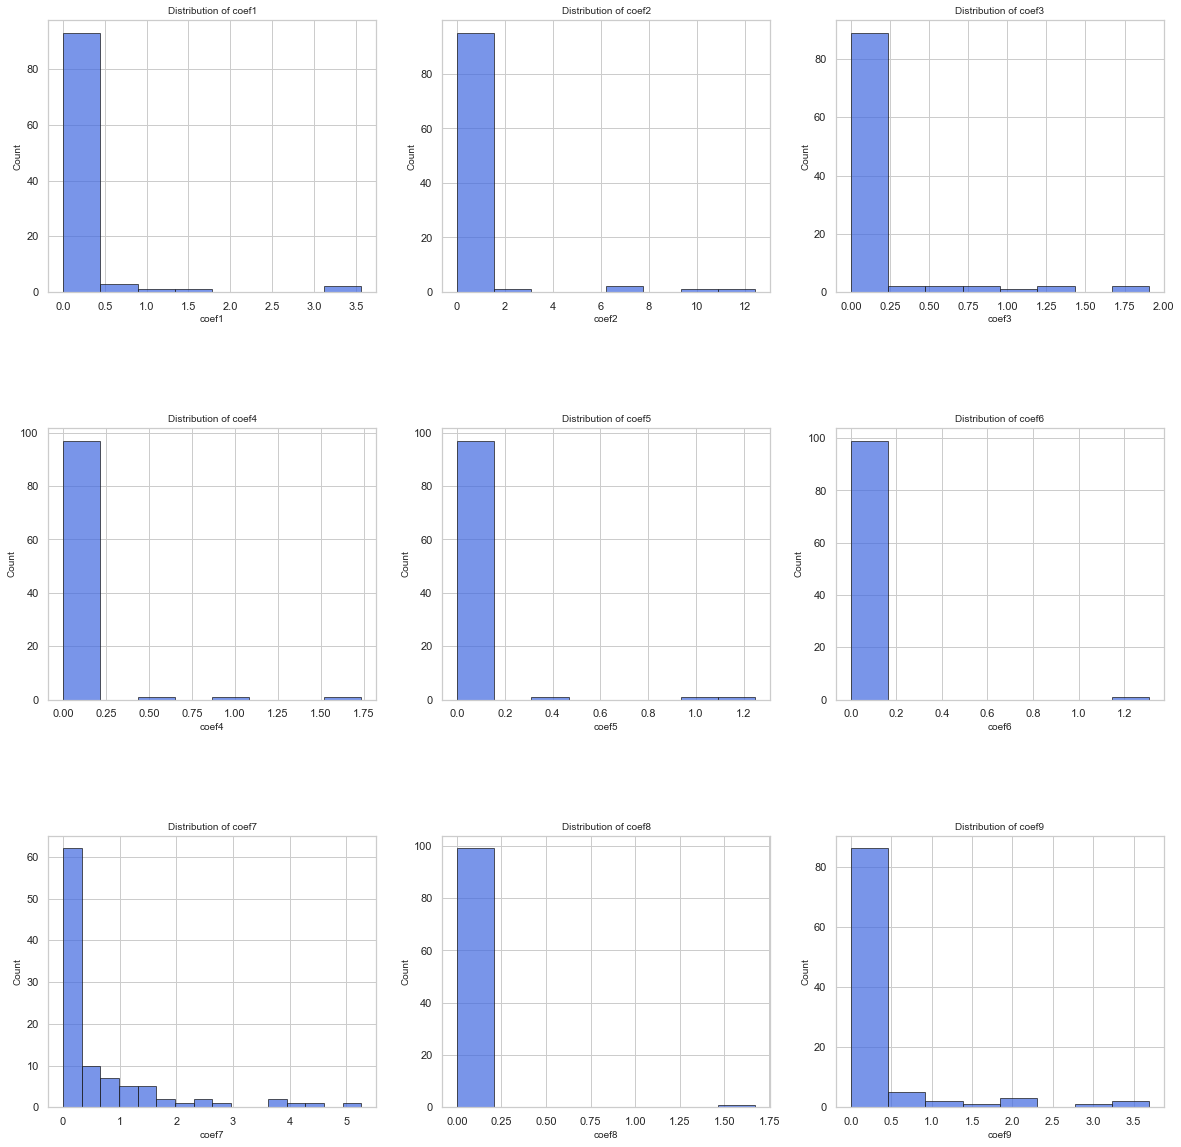

In [102]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2)
axs = axs.ravel()
fontsize = 10

variables = ['coef1', 'coef2', 'coef3', 'coef4', 'coef5', 'coef6', 'coef7', 'coef8', 'coef9']

# plot histograms
for i, variable in enumerate(variables):
    axs[i].hist(coefs[variable], alpha=0.7, color='royalblue', bins='auto', density=False, histtype = 'bar', edgecolor='k')
    axs[i].set_title("Distribution of " + variable, fontsize=fontsize)
    axs[i].set_xlabel(variable, fontsize=fontsize)
    axs[i].set_ylabel('Count', fontsize=fontsize)

In [37]:
lassoCV = LassoCV(fit_intercept = True, cv = 10).fit(X_train1, y_train)
y_pred_lassoCV = lassoCV.predict(X_test1)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lassoCV)}")
print(f"Lasso R2: {r2_score(y_test, y_pred_lassoCV)}")
print(y_pred_lassoCV)
print(lassoCV.coef_)
print(lassoCV.intercept_)
lasso_initial_standardized_mse = mean_squared_error(y_test, y_pred_lassoCV)
lasso_initial_standardized_r2 = r2_score(y_test, y_pred_lassoCV)

Lasso MSE: 4.524136111111125
Lasso R2: -0.5654450211457194
[47.82166667 47.82166667]
[-0.  0. -0. -0. -0. -0.  0. -0. -0.]
47.82166666666666


In [38]:
lassoCV1 = LassoCV(fit_intercept = True, cv = 10).fit(X_train, y_train)
y_pred_lassoCV1 = lassoCV1.predict(X_test)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lassoCV1)}")
print(f"Lasso R2: {r2_score(y_test, y_pred_lassoCV1)}")
print(y_pred_lassoCV1)
print(lassoCV1.coef_)
print(lassoCV1.intercept_)

Lasso MSE: 4.524136111111125
Lasso R2: -0.5654450211457194
[47.82166667 47.82166667]
[-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.10642077e-17
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00]
47.82166666666666


#### - PCA DataFrame

In [39]:
lassoCV_pca = LassoCV(fit_intercept = True, cv = 10).fit(X_train_pca, y_train)
y_pred_lassoCV_pca = lassoCV_pca.predict(X_test_pca)
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lassoCV_pca)}")
print(f"Lasso R2: {r2_score(y_test, y_pred_lassoCV_pca)}")
print(y_pred_lassoCV_pca)
print(lassoCV_pca.coef_)
print(lassoCV_pca.intercept_)
lasso_pca_mse = mean_squared_error(y_test, y_pred_lassoCV_pca)
lasso_pca_r2 = r2_score(y_test, y_pred_lassoCV_pca)

Lasso MSE: 4.524136111111125
Lasso R2: -0.5654450211457194
[47.82166667 47.82166667]
[-0.00000000e+00  1.10123478e-16  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00]
47.82166666666666


In [40]:
results_df = pd.DataFrame({'regressor':['Linear Regression Initial Data', 'Linear Regression PCA', 'Lasso Standardized Initial Data', 'Lasso PCA'],
                          'MSE':[lreg_initial_mse, lreg_pca_mse, lasso_initial_standardized_mse, lasso_pca_mse],
                          'R2':[lreg_initial_r2, lreg_pca_r2, lasso_initial_standardized_r2, lasso_pca_r2]})
display(results_df)

,regressor,MSE,R2
0,Linear Regression Initial Data,98.184059,-32.973723
1,Linear Regression PCA,4.880006,-0.688584
2,Lasso Standardized Initial Data,4.524136,-0.565445
3,Lasso PCA,4.524136,-0.565445


#### The results with Lasso are worse that expected, it zeros all the coefficients and leaves only the intercept as non-zero.

### 3. k-NN
#### - Initial DataFrame

In [44]:
n = np.linspace(1,20,20)
mse_knn = []
mse_knn1 = []

for ni in n:
    knn = KNeighborsRegressor(n_neighbors=int(ni))#.fit(X_train1, y_train)
    #y_test_knn = knn.predict(X_test1)
    mse_knn11 = cross_validate(knn, X_train1, y_train, cv = 3)
    mse_knn1.append(np.mean(np.abs(mse_knn11['test_score'])))
    #mse_knn.append(mean_squared_error(y_test, y_test_knn))

#print(mse_knn)
#print(mse_knn1)
#print(f"NN with lowest MSE: {np.min(mse_knn)} on test set: {n[np.argmin(mse_knn)]}")
print(f"NN with lowest MSE: {np.min(mse_knn1)} using cross-validation: {n[np.argmin(mse_knn1)]}")

NN with lowest MSE: 0.03827867818058003 using cross-validation: 19.0


In [46]:
knn = KNeighborsRegressor(n_neighbors=19).fit(X_train1, y_train)
y_test_knn = knn.predict(X_test1)
knn_initial_standardized_mse = mean_squared_error(y_test, y_test_knn)
knn_initial_strandardized_r2 = r2_score(y_test, y_test_knn)
print(knn_initial_standardized_mse, knn_initial_strandardized_r2)

2.8220317174515355 0.02351843686797994


In [47]:
n = np.linspace(1,30,30)
mse_knn = []
mse_knn1 = []

for ni in n:
    knn = KNeighborsRegressor(n_neighbors=int(ni))#.fit(X_train, y_train)
    #y_test_knn = knn.predict(X_test)
    mse_knn11 = cross_validate(knn, X_train, y_train, cv = 10)
    mse_knn1.append(np.mean(np.abs(mse_knn11['test_score'])))
    #mse_knn.append(mean_squared_error(y_test, y_test_knn))

#print(f"NN with lowest MSE: {np.min(mse_knn)} on test set: {n[np.argmin(mse_knn)]}")
print(f"NN with lowest MSE: {np.min(mse_knn1)} using cross-validation: {n[np.argmin(mse_knn1)]}")

NN with lowest MSE: 0.21933953419314864 using cross-validation: 21.0


In [48]:
knn = KNeighborsRegressor(n_neighbors=21).fit(X_train, y_train)
y_test_knn1 = knn.predict(X_test)
knn_initial_standardized_mse1 = mean_squared_error(y_test, y_test_knn1)
knn_initial_strandardized_r21 = r2_score(y_test, y_test_knn1)
print(knn_initial_standardized_mse1, knn_initial_strandardized_r21)

3.878066439909288 -0.34189150169871674


#### - PCA DataFrame

In [272]:
n = np.linspace(1,20,20)
mse_knn_pca = []
mse_knn1_pca = []

for ni in n:
    knn_pca = KNeighborsRegressor(n_neighbors=int(ni)).fit(X_train_pca, y_train)
    y_test_knn_pca = knn_pca.predict(X_test_pca)
    mse_knn11_pca = cross_validate(knn_pca, X_train_pca, y_train, cv = 3)
    mse_knn1_pca.append(np.mean(np.abs(mse_knn11_pca['test_score'])))
    mse_knn_pca.append(mean_squared_error(y_test, y_test_knn_pca))

print(f"NN with lowest MSE: {np.min(mse_knn_pca)} on test set: {n[np.argmin(mse_knn_pca)]}")
print(f"NN with lowest MSE: {np.min(mse_knn1_pca)} using cross-validation: {n[np.argmin(mse_knn1_pca)]}")

NN with lowest MSE: 2.3917000000000006 on test set: 6.0
NN with lowest MSE: 0.03249975381702286 using cross-validation: 20.0


In [273]:
knn_pca = KNeighborsRegressor(n_neighbors=19).fit(X_train_pca, y_train)
y_test_knn_pca = knn_pca.predict(X_test_pca)
knn_pca_mse = mean_squared_error(y_test, y_test_knn_pca)
knn_pca_r2 = r2_score(y_test, y_test_knn_pca)

In [277]:
results_df = pd.DataFrame({'regressor':['Linear Regression Initial Data', 'Linear Regression PCA', 'Lasso Standardized Initial Data', 'Lasso PCA','kNN Standardized Initial Data', 'kNN PCA Data'],
                          'MSE':[lreg_initial_mse, lreg_pca_mse, lasso_initial_standardized_mse, lasso_pca_mse, knn_initial_standardized_mse, knn_pca_mse],
                          'R2':[lreg_initial_r2, lreg_pca_r2, lasso_initial_standardized_r2, lasso_pca_r2, knn_initial_strandardized_r2, knn_pca_r2]})
display(results_df)

,regressor,MSE,R2
0,Linear Regression Initial Data,98.184059,-32.973723
1,Linear Regression PCA,4.880006,-0.688584
2,Lasso Standardized Initial Data,4.524136,-0.565445
3,Lasso PCA,4.524136,-0.565445
4,kNN Standardized Initial Data,2.822032,0.023518
5,kNN PCA Data,5.455055,-0.887562


### 4. DecisionTreeRegressor
#### - Initial DataFrame

In [103]:
max_depths = np.linspace(1,20,20)
mse_dtree = []
mse_dtree_test = []

for max_depth in max_depths:
    dtree =  DecisionTreeRegressor(max_depth = max_depth).fit(X_train, y_train)
    mse_dtree1 = cross_validate(dtree, X_train, y_train, cv = 3)
    mse_dtree.append(np.mean(np.abs(mse_dtree1['test_score'])))
    y_test_pred_dtree = dtree.predict(X_test)
    mse_dtree_test.append(mean_squared_error(y_test,y_test_pred_dtree))

print(f"The lowest MSE: {np.min(mse_dtree)}, with max_tree depth: {max_depths[np.argmin(mse_dtree)]}")
print(f"The lowest test MSE: {np.min(mse_dtree_test)}, with max_tree depth: {max_depths[np.argmin(mse_dtree_test)]}")

The lowest MSE: 0.5230325794015717, with max_tree depth: 1.0
The lowest test MSE: 0.1060050661157033, with max_tree depth: 3.0


In [284]:
dtree_best = DecisionTreeRegressor(max_depth = 1).fit(X_train, y_train)
y_test_pred_best = dtree_best.predict(X_test)
print(dtree_best.predict(X_test))
print(y_test)
print(r2_score(y_test, y_test_pred_best))
print(mean_squared_error(y_test, y_test_pred_best))

dtree_initial_mse = mean_squared_error(y_test, y_test_pred_best)
dtree_initial_r2 = r2_score(y_test, y_test_pred_best)

[48.29705882 48.29705882]
[47.4 50.8]
-0.22308461345050867
3.5347145328719667


#### - PCA

In [105]:
max_depths = np.linspace(1,20,20)
mse_dtree_pca = []
mse_dtree_test_pca = []

for max_depth in max_depths:
    dtree_pca =  DecisionTreeRegressor(max_depth = max_depth).fit(X_train_pca, y_train)
    mse_dtree1_pca = cross_validate(dtree_pca, X_train_pca, y_train, cv = 3)
    mse_dtree_pca.append(np.mean(np.abs(mse_dtree1_pca['test_score'])))
    y_test_pred_dtree_pca = dtree_pca.predict(X_test_pca)
    mse_dtree_test_pca.append(mean_squared_error(y_test,y_test_pred_dtree_pca))

print(f"The lowest MSE: {np.min(mse_dtree_pca)}, with max_tree depth: {max_depths[np.argmin(mse_dtree_pca)]}")
print(f"The lowest test MSE: {np.min(mse_dtree_test_pca)}, with max_tree depth: {max_depths[np.argmin(mse_dtree_test_pca)]}")

The lowest MSE: 0.07256452909892437, with max_tree depth: 1.0
The lowest test MSE: 2.9084640138408284, with max_tree depth: 5.0


In [287]:
dtree_pca = DecisionTreeRegressor(max_depth = 1).fit(X_train_pca, y_train)
y_test_pred_pca = dtree_pca.predict(X_test_pca)
print(dtree_pca.predict(X_test_pca))
print(y_test)
print(r2_score(y_test, y_test_pred_pca))
print(mean_squared_error(y_test, y_test_pred_pca))

dtree_pca_mse = mean_squared_error(y_test, y_test_pred_pca)
dtree_pca_r2 = r2_score(y_test, y_test_pred_pca)

[48.56515152 48.56515152]
[47.4 50.8]
-0.09898370302585491
3.176062901744718


In [288]:
results_df = pd.DataFrame({'regressor':['Linear Regression Initial Data', 'Linear Regression PCA', 'Lasso Standardized Initial Data', 'Lasso PCA','kNN Standardized Initial Data', 'kNN PCA Data', 'Decision Tree Initial Data', 'Decision Tree PCA'],
                          'MSE':[lreg_initial_mse, lreg_pca_mse, lasso_initial_standardized_mse, lasso_pca_mse, knn_initial_standardized_mse, knn_pca_mse, dtree_initial_mse, dtree_pca_mse],
                          'R2':[lreg_initial_r2, lreg_pca_r2, lasso_initial_standardized_r2, lasso_pca_r2, knn_initial_strandardized_r2, knn_pca_r2, dtree_initial_r2, dtree_pca_r2]})
display(results_df)

,regressor,MSE,R2
0,Linear Regression Initial Data,98.184059,-32.973723
1,Linear Regression PCA,4.880006,-0.688584
2,Lasso Standardized Initial Data,4.524136,-0.565445
3,Lasso PCA,4.524136,-0.565445
4,kNN Standardized Initial Data,2.822032,0.023518
5,kNN PCA Data,5.455055,-0.887562
6,Decision Tree Initial Data,3.176063,-0.098984
7,Decision Tree PCA,3.176063,-0.098984


### 5. RandomForrestRegressor
#### - Initial DataFrame

**Here we need better hyperparameter tunning and also to determine a random state**

In [293]:
max_depths = np.linspace(1,20,20)

mse_rf = []
for max_depth in max_depths:
    rf = RandomForestRegressor(n_estimators = 100, max_depth = max_depth, random_state = 42).fit(X_train, y_train)
    mse_rf1 = cross_validate(rf, X_train, y_train, cv = 3)
    mse_rf.append(np.mean(np.abs(mse_rf1['test_score'])))
print(mse_rf)

[0.2722395452074928, 0.41019710417999583, 0.4312511551136617, 0.48860418994631166, 0.45745119558382935, 0.46143621842110255, 0.4726748380580712, 0.48005663538186183, 0.4787613017579991, 0.47773676459565423, 0.47825809666898395, 0.47817879360780274, 0.47817879360780274, 0.47817879360780274, 0.47817879360780274, 0.47817879360780274, 0.47817879360780274, 0.47817879360780274, 0.47817879360780274, 0.47817879360780274]


In [294]:
d = max_depths[np.argmin(mse_rf)]
print(d)

1.0


In [308]:
rf = RandomForestRegressor(n_estimators = 163, max_depth = 1, random_state = 42).fit(X_train, y_train)
y_test_pred_rf = rf.predict(X_test)
print(r2_score(y_test, y_test_pred_rf))
print(y_test_pred_rf)

rf_initial_mse = mean_squared_error(y_test, y_test_pred_rf)
rf_initial_r2 = r2_score(y_test, y_test_pred_rf)

-0.8069674570412915
[47.04455289 47.58784663]


In [103]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 700, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, 20)]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

# Create a based model
rf = RandomForestRegressor(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

grid_search.best_params_


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   57.9s finished


{'max_depth': 1, 'n_estimators': 700}

#### - PCA DataFrame

In [309]:
max_depths = np.linspace(1,20,20)

mse_rf_pca = []
for max_depth in max_depths:
    rf_pca = RandomForestRegressor(n_estimators = 100, max_depth = max_depth, random_state = 42).fit(X_train_pca, y_train)
    mse_rf1_pca = cross_validate(rf_pca, X_train_pca, y_train, cv = 3)
    mse_rf_pca.append(np.mean(np.abs(mse_rf1_pca['test_score'])))
print(mse_rf_pca)

[0.2721728521493502, 0.2768589920421576, 0.20466616125611256, 0.22723576989775443, 0.20346306418622842, 0.18135083230046942, 0.17462477993073264, 0.17364658750301212, 0.17295502907980662, 0.17334402283712422, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303, 0.17263287111135303]


In [310]:
d = max_depths[np.argmin(mse_rf_pca)]
print(d)

11.0


In [311]:
rf_pca = RandomForestRegressor(n_estimators = 100, max_depth = d, random_state = 42).fit(X_train_pca, y_train)
y_test_pred_rf_pca = rf_pca.predict(X_test_pca)
print(r2_score(y_test, y_test_pred_rf_pca))
print(y_test_pred_rf_pca)

-0.6618301038062351
[47.717 47.717]


In [312]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 700, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, 20)]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

# Create a based model
rf = RandomForestRegressor(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, scoring = 'r2', n_jobs = -1, verbose = 2)
grid_search.fit(X_train_pca, y_train)

grid_search.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.0min finished


{'max_depth': 5, 'n_estimators': 700}

In [315]:
rf_pca = RandomForestRegressor(n_estimators = 700, max_depth = 5, random_state = 42).fit(X_train_pca, y_train)
y_test_pred_rf_pca = rf_pca.predict(X_test_pca)
print(r2_score(y_test, y_test_pred_rf_pca))
print(y_test_pred_rf_pca)

rf_pca_mse = mean_squared_error(y_test, y_test_pred_rf_pca)
rf_pca_r2 = r2_score(y_test, y_test_pred_rf_pca)

-1.6241819846322127
[46.98365808 46.92773564]


In [316]:
results_df = pd.DataFrame({'regressor':['Linear Regression Initial Data', 'Linear Regression PCA', 'Lasso Standardized Initial Data', 'Lasso PCA','kNN Standardized Initial Data', 'kNN PCA Data', 'Decision Tree Initial Data', 'Decision Tree PCA', 'Random Forrest Initial Data', 'Random Forrest PCA'],
                          'MSE':[lreg_initial_mse, lreg_pca_mse, lasso_initial_standardized_mse, lasso_pca_mse, knn_initial_standardized_mse, knn_pca_mse, dtree_initial_mse, dtree_pca_mse, rf_initial_mse, rf_pca_mse],
                          'R2':[lreg_initial_r2, lreg_pca_r2, lasso_initial_standardized_r2, lasso_pca_r2, knn_initial_strandardized_r2, knn_pca_r2, dtree_initial_r2, dtree_pca_r2, rf_initial_r2, rf_pca_r2]})
display(results_df)

,regressor,MSE,R2
0,Linear Regression Initial Data,98.184059,-32.973723
1,Linear Regression PCA,4.880006,-0.688584
2,Lasso Standardized Initial Data,4.524136,-0.565445
3,Lasso PCA,4.524136,-0.565445
4,kNN Standardized Initial Data,2.822032,0.023518
5,kNN PCA Data,5.455055,-0.887562
6,Decision Tree Initial Data,3.176063,-0.098984
7,Decision Tree PCA,3.176063,-0.098984
8,Random Forrest Initial Data,5.222136,-0.806967
9,Random Forrest PCA,7.583886,-1.624182


### 6. Boosting
#### - Initial DataFrame

In [194]:
depths = np.linspace(1,10,10)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 11, stop = 501, num = 20)]
# Learning Rate
learning_rate = [1e-3,1e-2,1e-1,1,10]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

scores = []
params = []
for depth in depths:
    # Create a based model
    ada = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = depth), random_state = 0)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring = 'r2')
    grid_search.fit(X_train, y_train)
    
    params.append(grid_search.best_params_)
    print(grid_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 0.1, 'n_estimators': 88}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 0.1, 'n_estimators': 88}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 0.1, 'n_estimators': 165}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.5s finished


{'learning_rate': 1, 'n_estimators': 191}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.4s finished


{'learning_rate': 0.1, 'n_estimators': 165}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.2s finished


{'learning_rate': 1, 'n_estimators': 320}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.5s finished


{'learning_rate': 1, 'n_estimators': 372}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.8s finished


{'learning_rate': 1, 'n_estimators': 449}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.6s finished


{'learning_rate': 1, 'n_estimators': 397}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.2s finished


{'learning_rate': 1, 'n_estimators': 397}


In [317]:
learning_rate = 0.1
depth = 5
n_estimators = 165

ada = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = depth), n_estimators = n_estimators, learning_rate = learning_rate, random_state = 0).fit(X_train, y_train)
y = ada.predict(X_test)
print(r2_score(y_test, y))
print(y)
print(y_test)

ada_initial_mse = mean_squared_error(y_test, y)
ada_initial_r2 = r2_score(y_test, y)

0.5502864282968083
[47.03333333 49.23      ]
[47.4 50.8]


#### - PCA DataFrame

In [222]:
depths = np.linspace(1,10,10)

# Base Estimator
#base_estimator = [DecisionTreeRegressor(max_depth = depth) for depth in depths]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 11, stop = 501, num = 20)]
# Learning Rate
learning_rate = [1e-3,1e-2,1e-1,1,10]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

scores = []
params = []
for depth in depths:
    # Create a based model
    ada = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = depth), random_state = 0)
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = ada, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring = 'r2')
    grid_search.fit(X_train_pca, y_train)
    
    params.append(grid_search.best_params_)
    print(grid_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 1, 'n_estimators': 11}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.4s finished


{'learning_rate': 0.001, 'n_estimators': 320}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 0.1, 'n_estimators': 11}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.3s finished


{'learning_rate': 0.01, 'n_estimators': 294}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 0.01, 'n_estimators': 165}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.5s finished


{'learning_rate': 0.01, 'n_estimators': 191}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.3s finished


{'learning_rate': 0.01, 'n_estimators': 294}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 0.01, 'n_estimators': 165}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   22.8s finished


{'learning_rate': 0.01, 'n_estimators': 217}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   23.2s finished


{'learning_rate': 0.01, 'n_estimators': 217}


In [327]:
learning_rate = 0.1
depth = 1
n_estimators = 11

ada = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth = depth), n_estimators = n_estimators, learning_rate = learning_rate, random_state = 0).fit(X_train_pca, y_train)
y_pca = ada.predict(X_test_pca)
print(r2_score(y_test, y_pca))
print(y_pca)
print(y_test)

ada_pca_mse = mean_squared_error(y_test, y_pca)
ada_pca_r2 = r2_score(y_test, y_pca)

-0.09616839451773118
[48.5728125 48.5728125]
[47.4 50.8]


*performance rather poor here*

In [328]:
results_df = pd.DataFrame({'regressor':['Linear Regression Initial Data', 'Linear Regression PCA', 'Lasso Standardized Initial Data', 'Lasso PCA','kNN Standardized Initial Data', 'kNN PCA Data', 'Decision Tree Initial Data', 'Decision Tree PCA', 'Random Forrest Initial Data', 'Random Forrest PCA', 'Boosting Initial Data', 'Boosting PCA'],
                          'MSE':[lreg_initial_mse, lreg_pca_mse, lasso_initial_standardized_mse, lasso_pca_mse, knn_initial_standardized_mse, knn_pca_mse, dtree_initial_mse, dtree_pca_mse, rf_initial_mse, rf_pca_mse, ada_initial_mse, ada_pca_mse],
                          'R2':[lreg_initial_r2, lreg_pca_r2, lasso_initial_standardized_r2, lasso_pca_r2, knn_initial_strandardized_r2, knn_pca_r2, dtree_initial_r2, dtree_pca_r2, rf_initial_r2, rf_pca_r2, ada_initial_r2, ada_pca_r2]})
display(results_df)

,regressor,MSE,R2
0,Linear Regression Initial Data,98.184059,-32.973723
1,Linear Regression PCA,4.880006,-0.688584
2,Lasso Standardized Initial Data,4.524136,-0.565445
3,Lasso PCA,4.524136,-0.565445
4,kNN Standardized Initial Data,2.822032,0.023518
5,kNN PCA Data,5.455055,-0.887562
6,Decision Tree Initial Data,3.176063,-0.098984
7,Decision Tree PCA,3.176063,-0.098984
8,Random Forrest Initial Data,5.222136,-0.806967
9,Random Forrest PCA,7.583886,-1.624182
